In [1]:
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

import xarray as xr
import sys
sys.path.append('../dataset')
from data.common import  CreateListOfLinkfilesInSpan

In [2]:
f = open('../path_to_data.txt', "r")
path_to_dataset = f.read()
f.close() 

In [4]:
y_train = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/train/y.npy'))
y_val = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/validation/y.npy'))

In [5]:
def view_label(y):
    tot = len(y)
    rain = len(y[y > 0.0])
    print('rain fraction', rain/tot)
    fig, ax = plt.subplots(figsize = (8,5))
    ax.hist(y[y > 0.0], bins = 500)
    plt.show()
    #print('smallest non-zero value', min(y[y > 0.0]))
    sorted_pos = np.sort(y[y>0.0])
    print('smallest non-zero values', sorted_pos[sorted_pos<0.1])
    print('amount',len(sorted_pos[sorted_pos<0.1]))
    print('small rain fraction of rain', len(sorted_pos[sorted_pos<0.1])/rain)
    fig, ax = plt.subplots(figsize = (8,5))
    ax.hist(np.log(y[y > 0.0]), bins = 500)
    plt.show()

rain fraction 0.06227764867493168


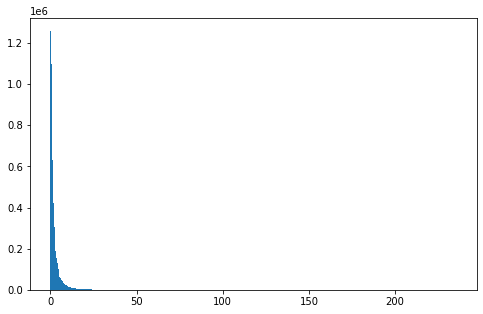

smallest non-zero values [0.02761395 0.02761395 0.03103964 0.03103964 0.03140611 0.03340144
 0.03340144 0.03676442 0.03676442 0.0442377  0.0442377  0.04519418
 0.04673437 0.0515606  0.06045365 0.06107258 0.06287173 0.0631508
 0.0631508  0.06326129 0.06326129 0.06495725 0.06555083 0.06555083
 0.06570843 0.06570843 0.0658026  0.06616142 0.06630769 0.06732467
 0.06816987 0.06906876 0.06939688 0.06939688 0.06993606 0.07024844
 0.07024844 0.07054906 0.07153081 0.07153081 0.07202037 0.07419198
 0.0746734  0.0746734  0.07483987 0.07579058 0.07579058 0.07636003
 0.07636003 0.07637342 0.07670072 0.07685816 0.07720342 0.07720342
 0.07755654 0.07813062 0.07813062 0.07850882 0.0795542  0.08043658
 0.08053171 0.08053171 0.08172617 0.08180412 0.08233176 0.08233176
 0.08284495 0.08295278 0.08369946 0.08463529 0.08463529 0.08474543
 0.084838   0.084838   0.08506875 0.08506875 0.08535788 0.08568636
 0.08568636 0.08617372 0.08617372 0.08718549 0.08718549 0.08783575
 0.08783575 0.08791491 0.08791491 0.08

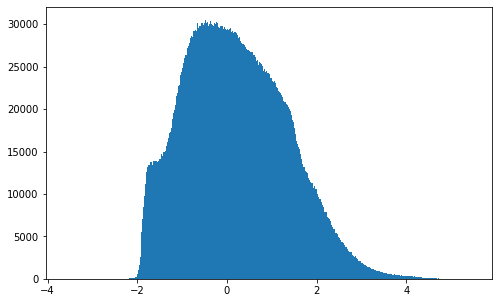

In [6]:
view_label(y_train)

rain fraction 0.06095402950921773


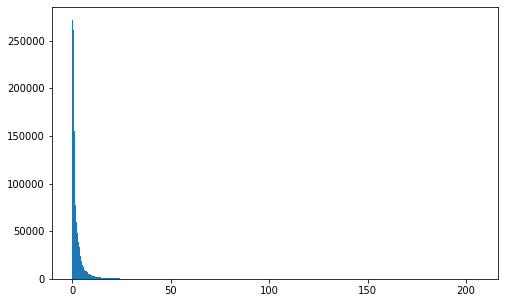

smallest non-zero values [0.03984801 0.03984801 0.04048919 0.04845629 0.04845629 0.053758
 0.053758   0.05937989 0.05937989 0.06032014 0.06153273 0.06333937
 0.06333937 0.06596954 0.06961817 0.07022233 0.07426675 0.07705447
 0.07705447 0.07849403 0.08010634 0.08010634 0.08426783 0.08426783
 0.08709716 0.08946238 0.08946238 0.09184182 0.09227362 0.09227362
 0.09439441 0.09563413 0.09569431 0.09569431 0.09610417 0.09610417
 0.09766445 0.09786455 0.09818911 0.09818911 0.09873698]
amount 41
small rain fraction of rain 3.23298209479892e-05


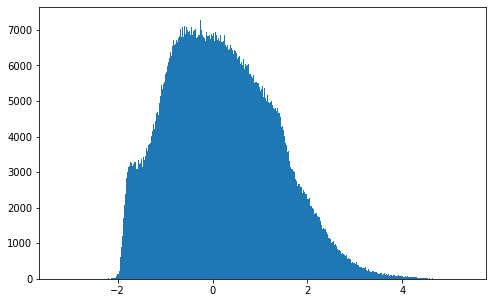

In [7]:
view_label(y_val)